## Fuzzy

In [66]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import pandas as pd
import matplotlib.pyplot as plt

In [111]:
df = pd.read_feather('Data/fuzzy_test_data')

df = df.loc[df['flow_rate'] == 0.5]

df.reset_index(drop=True).head()

,colormap,flow_rate,voltage,spray_mode
0,blue,0.5,4501.54,Intermittent
1,blue,0.5,4501.54,Intermittent
2,blue,0.5,4501.54,Intermittent
3,blue,0.5,4601.36,Intermittent
4,blue,0.5,4601.36,Intermittent


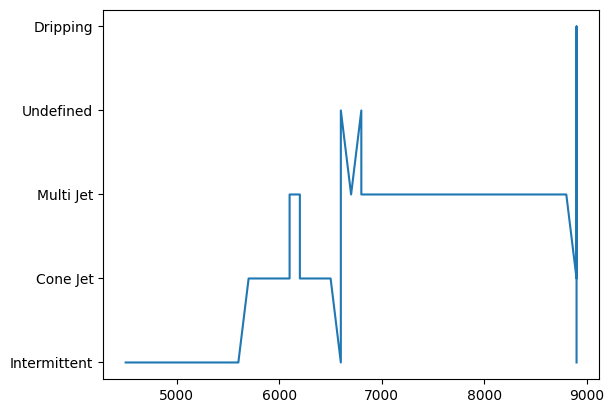

In [112]:
plt.plot(df['voltage'], df['spray_mode'])
plt.show()


In [113]:
# corona_sparks

dripping_mean = df['voltage'].loc[df['spray_mode'] == 'Dripping'].mean()
dripping_min = df['voltage'].loc[df['spray_mode'] == 'Dripping'].min()
dripping_max = df['voltage'].loc[df['spray_mode'] == 'Dripping'].max()

print("dripping mean: ", dripping_mean)
print("dripping min: ", dripping_min)
print("dripping max: ", dripping_max)
print("----------")


# Intermittent

intermittent_mean = df['voltage'].loc[df['spray_mode'] == 'Intermittent'].mean()
intermittent_min = df['voltage'].loc[df['spray_mode'] == 'Intermittent'].min()
intermittent_max = df['voltage'].loc[df['spray_mode'] == 'Intermittent'].max()

print("intermittent mean: ", intermittent_mean)
print("intermittent min: ", intermittent_min)
print("intermittent max: ", intermittent_max)
print("----------")

# Cone Jet

cone_jet_mean = df['voltage'].loc[df['spray_mode'] == 'Cone Jet'].mean()
cone_jet_min = df['voltage'].loc[df['spray_mode'] == 'Cone Jet'].min()
cone_jet_max = df['voltage'].loc[df['spray_mode'] == 'Cone Jet'].max()

print("cone_jet mean: ", cone_jet_mean)
print("cone_jet min: ", cone_jet_min)
print("cone_jet max: ", cone_jet_max)
print("----------")

# Multi Jet

multi_jet_mean = df['voltage'].loc[df['spray_mode'] == 'Multi Jet'].mean()
multi_jet_min = df['voltage'].loc[df['spray_mode'] == 'Multi Jet'].min()
multi_jet_max = df['voltage'].loc[df['spray_mode'] == 'Multi Jet'].max()

print("multi_jet mean: ", multi_jet_mean)
print("multi_jet min: ", multi_jet_min)
print("multi_jet max: ", multi_jet_max)
print("----------")



dripping mean:  8900.97
dripping min:  8900.97
dripping max:  8900.97
----------
intermittent mean:  6034.585925925922
intermittent min:  4501.54
intermittent max:  8900.97
----------
cone_jet mean:  6187.499999999999
cone_jet min:  5701.4
cone_jet max:  8900.97
----------
multi_jet mean:  7716.233150684931
multi_jet min:  6101.23
multi_jet max:  8800.91
----------


In [114]:

state = ctrl.Antecedent(np.arange(4000, 10000, 1), 'state')
voltage = ctrl.Consequent(np.arange(0, 100, 1), 'voltage')


state['dripping'] = fuzz.trapmf(state.universe, [dripping_min ,dripping_mean, dripping_mean, dripping_max])
state['intermittent'] = fuzz.trimf(state.universe, [intermittent_min, intermittent_mean , intermittent_max])
state['cone_jet'] = fuzz.trapmf(state.universe, [cone_jet_min, cone_jet_mean - 100, cone_jet_mean + 100, cone_jet_max])
state['multi_jet'] = fuzz.trapmf(state.universe, [multi_jet_min, multi_jet_mean - 100, multi_jet_mean + 100, multi_jet_max])
state['corona_spark'] = fuzz.trimf(state.universe, [multi_jet_max, multi_jet_max, multi_jet_max])

# Pythonic API
voltage['decrease'] = fuzz.trimf(voltage.universe, [0, 25, 50])
voltage['stabilize'] = fuzz.trimf(voltage.universe, [25, 50, 75])
voltage['increase'] = fuzz.trimf(voltage.universe, [50, 75, 100])

/Users/jota/Library/Python/3.9/lib/python/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


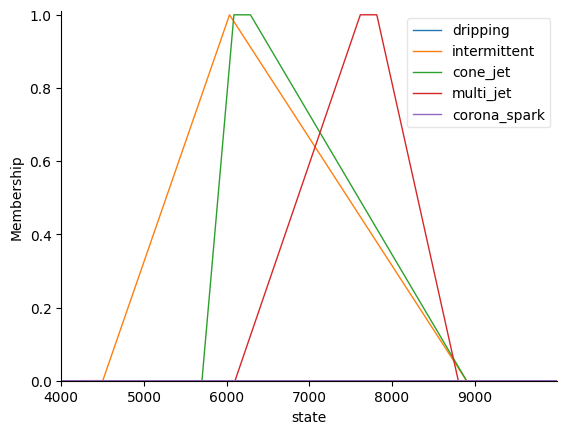

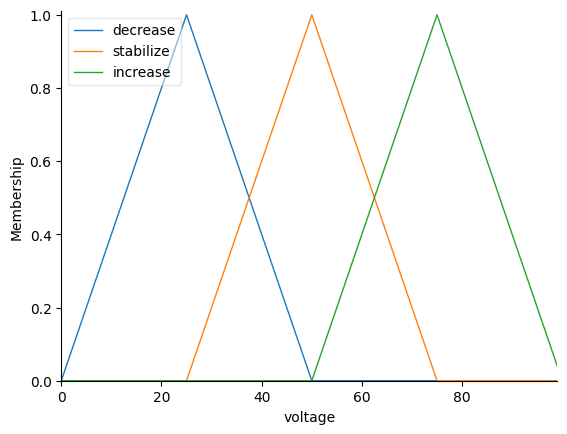

In [115]:

state.view()
voltage.view()

### Fuzzy rules

(<Figure size 640x480 with 1 Axes>, <AxesSubplot: >)

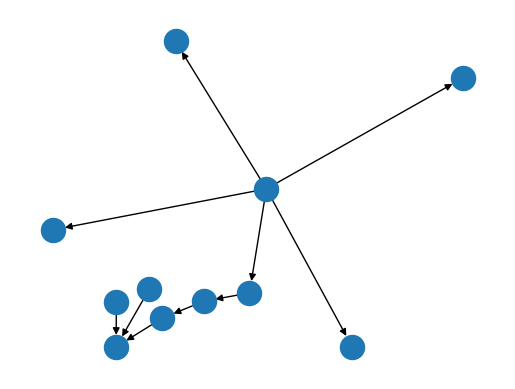

In [116]:
# Rules to stabilize in Cone Jet

rule1 = ctrl.Rule(state['dripping'], voltage['increase'])
rule2 = ctrl.Rule(state['intermittent'], voltage['increase'])
rule3 = ctrl.Rule(state['cone_jet'], voltage['stabilize'])
rule4 = ctrl.Rule(state['multi_jet'], voltage['decrease'])
rule5 = ctrl.Rule(state['corona_spark'], voltage['decrease'])

rule1.view()

### Control System Creation and Simulation

In [117]:
voltage_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])

PS_voltage = ctrl.ControlSystemSimulation(voltage_ctrl)

### Testing

74.9642004699335


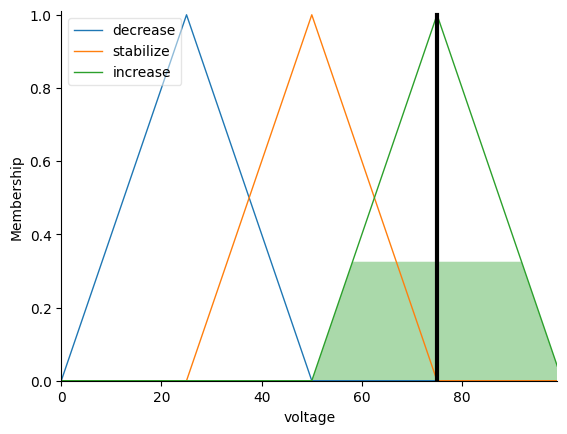

In [120]:

PS_voltage.input['state'] = 5000

PS_voltage.compute()

print (PS_voltage.output['voltage'])
voltage.view(sim=PS_voltage)